# Test de hipótesis

Supongamos que existe una nueva y contagiosa enfermedad y que se inventa un nuevo tratamiento médico con el fin de erradicarla. A modo de prueba el tratamiento es aplicado a una muestra de la población. 

Podemos definir $X$, una variable aleatoria binaria que indica si el tratamiento fue efectivo o no

En base a estos resultados, ¿cómo concluir formalmente que el tratamiento fue efectivo? además ¿qué podemos decir sobre la efectividad del tratamiento en la población general?

> En estadística este tipo de preguntas se resuelven utilizando un **test de hipótesis**


Test de hipótesis 
: Es un procedimiento de estadística inferencial para comprobar si el resultado de un experimento es significativo

El primer paso es formular las

Hipótesis
: Conjetura que planteamos respecto al resultado de nuestro experimento

Y en general lo que se plantea es una 

Hipótesis nula 
: Es una conjetura que suele representar el "status quo", es decir el escenario en que los resultados del experimento no son significativos. Se denota como $H_0$

La hipótesis nula suele redactarse de las siguientes formas

- "No hay diferencia entre la muestra X y la muestra Y"
- "No existe relación entre la variable X y la variable Y"

Para el ejemplo anterior podríamos redactar "No hay diferencia entre los pacientes que tomaron y los que no tomaron el tratamiento"

:::{important}

El test de hipótesis se diseña para medir que tan fuerte es la evidencia **en contra** de la hipótesis nula

:::

:::{seealso}

Puedes revisar otros ejemplos más pintorescos de hipótesis nula en [este link](https://www.thoughtco.com/null-hypothesis-examples-609097)

:::

El test de hipótesis también considera el complemento (contrario) de la hipótesis nula, que se denomina: **hipótesis alternativa**, que denotaremos $H_A$


## Algoritmo general de un test de hipótesis

El siguiente es el algoritmo general de un test de hipótesis paramétrico

1. Definir $H_0$ y $H_A$
1. Definir un estadístico $T$
1. Obtener la distribución para $T$ dado que $H_0$ es cierto
1. Seleccionar un nivel de significancia $\alpha$ 
1. Calcular el valor de $T$ para nuestros datos: $T_{data}$
1. Calcular el **p-value**

Finalmente:

`if`  $p < \alpha$ `:` se rechaza la hipótesis nula con confianza (1-$\alpha$)

`else:` No hay suficiente evidencia para rechazar la hipótesis nula


:::{note}

El valor de $\alpha$ nos permite controlar el **[Error tipo I](https://es.wikipedia.org/wiki/Errores_de_tipo_I_y_de_tipo_II)**, es decir el error que cometemos si rechazamos $H_0$ cuando en realidad era cierta (falso positivo). Típicamente se usa $\alpha=0.05$ o $\alpha=0.01$ 

:::

**Definición del p-value y errores de interpretación comunes**

En un test de hipótesis "de una cola" el p-value se define como la probabilidad de observar un valor del estadístico $T$ más extremo que el observamos en nuestra muestra, es decir

$$
p = P(T> T_{data} | H_0) 
$$





:::{error}

El p-value **no es** es la probabilidad de que $H_0$ sea cierta dado nuestras observaciones, eso sería:

$$
P(H_0 | T> T_{data})
$$

:::

Otro error común es creer que no ser capaz de rechazar $H_0$ es lo mismo que aceptar $H_0$

:::{error}

No tener suficiente evidencia para rechazar no es lo mismo que aceptar

:::

## El t-test de una muestra 

Sea un conjunto de $N$ observaciones independientes de una variable aleatoria $X$. La media muestral de este conjunto ${x_1, x_2, \ldots, x_N}$ es 

$$
\bar x = \sum_{i=1}^N x_i
$$ 

El **t-test de una muestra** busca verificar si $\bar x$ (media muestral) es significativamente distinta de la **media poblacional** $\mu$, en el caso de que **no conocemos la varianza poblacional** $\sigma^2$

Las hipótesis son

- $H_0:$ $\bar x = \mu$
- $H_A:$ $\bar x \neq \mu$ 

(Esto corresponde a un test de dos colas)

Para este test el estadístico de prueba es 

$$
t = \frac{\bar x - \mu}{\hat \sigma /\sqrt{N-1}}
$$

donde $\hat \sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^N (x_i - \bar x)^2}$ es la desviación estándar muestral (sesgada)

Asumiendo que $\bar x$ se distribuye $\mathcal{N}(\mu, \frac{\sigma^2}{N})$ entonces
$t$ se distribuye [t-student](https://en.wikipedia.org/wiki/Student%27s_t-distribution) con $N-1$ grados de libertad

:::{warning}

Para muestras iid y $N$ grande el supuesto del t-test se cumple por teorema central del límite. Si $N$ es pequeño debemos verificar la normalidad de los datos antes de aplicar el t-test

:::


## T-test de una y dos muestras con scipy

**Ejemplo 1:** Una investigadora en botánica quiere saber si la áltura promedio de cierta especia de planta es igual a 38 cm (hipótesis nula) 

Para esto colecta una muestra aleatoria de 12 plantas y registra su altura:

In [1]:
import numpy as np
import scipy.stats

mu = 38.
alpha = 0.05
data = np.load("data/botany.npy")
data

array([35.56, 35.56, 40.64, 33.02, 30.48, 43.18, 38.1 , 35.56, 38.1 ,
       33.02, 38.1 , 35.56])

Para realizar un t-test de una muestra con scipy utilizamos

In [2]:
result = scipy.stats.ttest_1samp(data, mu, alternative='two-sided')
result

Ttest_1sampResult(statistic=-1.5853482351389023, pvalue=0.1411941997029352)

donde

In [3]:
result.pvalue < alpha

False

> No hay suficiente evidencia para rechazar la hipótesis nula 

**Ejemplo 2:** Un médico bioregulador quiere verificar si el gasto energético promedio es menor en personas obesas que en personas no obesas

Para esto evalua una muestra al azar de personas obesas y una muestra al azar de personas delgadas y registra los resultados en la siguiente base de datos:

In [4]:
alpha = 0.05

energy, label = np.load('data/energy.npy').T
sample_control, sample_obese = energy[label==0], energy[label==1]

Para resolver este problema podemos utilizar **un t-test de dos muestras**. En este test la hipótesis nula es que las medias de ambas muestreas son equivalentes, mientras que la hipótesis alternativa puede ser

- que las medias muestrales son distintas (dos colas)
- que la media de la primera muestra es mayor que la de la segunda (una cola)
- que la media de la primera muestra es menor que la de la segunda (una cola)

Podemos resolver un t-test de dos muestras como el del ejemplo anterior utilizando scipy con

In [5]:
result = scipy.stats.ttest_ind(sample_obese, sample_control, alternative='less')
result

Ttest_indResult(statistic=-3.9455649161549835, pvalue=0.00039949910558502964)

donde

In [6]:
result.pvalue < alpha

True

> Rechazamos la hipótesis nula de que los gastos energéticos son iguales

## Test de hipótesis para la regresión lineal

En un modelo de regresión lineal donde tenemos $N$ ejemplos

$$
y_i = x_i \theta_1 + \theta_0, ~ i=1, 2, \ldots, N
$$

nos interesa probar que la correlación entre $x$ es $y$ es significativa. Podemos hacer esto realizando un test sobre el parámetro $\theta_1$

Por ejemplo podemos plantear las siguientes hipótesis

- $H_0:$ La pendiente es nula $\theta_1 = 0$ (no hay correlación entre $x$ e $y$)
- $H_A:$ La pendiente no es nula: $\theta_1 \neq 0$ 

(test de dos colas)

Asumiendo que $\theta_1$ se distribuye normal con varianza desconocida podemos formular el siguiente estadístico de prueba 

$$
t = \frac{(\theta_1-\theta^*) }{\text{SE}_{\theta_1}/\sqrt{N-2}} = \frac{ r\sqrt{N-2}}{\sqrt{1-r^2}},
$$

donde $r \in [-1, 1]$ es el [coeficiente de correlación de Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), el cual es comunmente utilizado para medir la fuerza de la correlación

- si $r=1$ existe una correlación lineal perfecta
- si $r=-1$ existe una anticorrelación lineal perfecta
- si $r=0$ no hay correlación lineal entre las variables

:::{note}

En general un $r>0.5$ se considera una correlación importante

:::


La última igualdad en la expresión de $t$ se obtiene reemplazando $\theta^*=0$ y 

$$
\text{SE}_{\theta_1} = \sqrt{ \frac{\frac{1}{N} \sum_i (y_i - \hat y_i)^2}{\text{Var}(x)}}.
$$ 

:::{note}

Si $\theta_1$ es normal entonces el estadístico $t$ tiene distribución t-student con dos grados de libertad (modelo de dos parámetros) 

:::

**Ejercicio formativo**

Sea el dataset de consumo de helados que utilizamos en lecciones anteriores

In [7]:
import pandas as pd
df = pd.read_csv('../linalg/data/helados.csv', header=0, index_col=0)
df.columns = ['consumo', 'ingreso', 'precio', 'temperatura']
display(df.head())

,consumo,ingreso,precio,temperatura
1,0.386,78,0.270,41
2,0.374,79,0.282,56
3,0.393,81,0.277,63
4,0.425,80,0.280,68
5,0.406,76,0.272,69


Podemos resolver un problema de regresión lineal univariado con scipy utilizando

```python
scipy.stats.linregress(x, # Variable independiente unidimensional
                       y # Variable dependiente unidimensional
                      )
```

Esta función retorna una tupla con

- Valor de la pendiente: $\theta_1$
- Valor de la intercepta: $\theta_0$
- Coeficiente de correlación $r$
- p-value
- Error estándar del ajuste

Para el ejemplo anterior podemos ajustar regresiones lineales entre consumo y las demás variables:

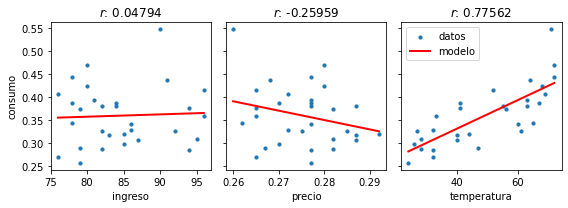

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(8, 3), tight_layout=True, sharey=True)
ax[0].set_ylabel(df.columns[0]);
for ax_, col in zip(ax, df.columns[1:]):
    res = scipy.stats.linregress(df[col], df["consumo"])
    x_plot = np.linspace(np.amin(df[col]), np. amax(df[col]), num=100)
    ax_.scatter(df[col], df["consumo"], label='datos', s=10)    
    ax_.plot(x_plot, res.slope*x_plot + res.intercept, lw=2, c='r', label='modelo');
    ax_.set_xlabel(col)
    ax_.set_title(f"$r$: {res.rvalue:0.5f}")
ax_.legend();

Es decir que visualmente parece existir

- una correlación cercana a cero entre consumo e ingreso
- una correlación negativa moderada entre consumo y precio
- una correlación positiva alta entre consumo y temperatura

La función `linregress` implementa el t-test sobre $\theta_1$ que vimos anteriormente. Usemos estos resultados para verificar si las correlaciones son estadísticamente significativas

In [9]:
alpha = 0.05

for i, col in enumerate(df.columns[1:]):
    res = scipy.stats.linregress(df[col], df["consumo"])
    print(f"{col}: \t Rechazo hipótesis nula: {res.pvalue < alpha}")    

ingreso: 	 Rechazo hipótesis nula: False
precio: 	 Rechazo hipótesis nula: False
temperatura: 	 Rechazo hipótesis nula: True


Como complemento visualizemos 

- las distribuciones bajo la hipótesis nula: linea azul
- los límites dados por $\alpha$: linea punteada negra (dos colas)
- El valor del observado para cada una de las variables: linea roja 

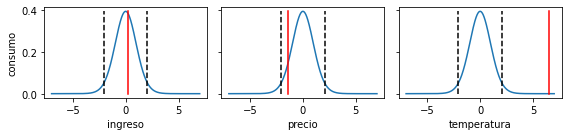

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(8, 2), tight_layout=True, sharey=True)
ax[0].set_ylabel(df.columns[0]);

N = df.shape[0]
t = np.linspace(-7, 7, num=1000)
dist = scipy.stats.t(loc=0, scale=1, df=N-2) # dos grados de libertad


for i, col in enumerate(df.columns[1:]):
    res = scipy.stats.linregress(df[col], df["consumo"])
    t_data = res.rvalue*np.sqrt(N-2)/np.sqrt(1.-res.rvalue**2)
    ax[i].plot(t, dist.pdf(t))
    ax[i].plot([dist.ppf(alpha/2)]*2, [0, np.amax(dist.pdf(t))], 'k--')
    ax[i].plot([dist.ppf(1-alpha/2)]*2, [0, np.amax(dist.pdf(t))], 'k--')
    ax[i].plot([t_data]*2, [0, np.amax(dist.pdf(t))], 'r-')
    ax[i].set_xlabel(col)    

Por lo tanto

> Rechazamos la hipótesis nula de que no existe correlación entre temperatura y consumo con un 95% de confianza

Para las variables ingreso y precio no existe suficiente evidencia para rechazar la hipótesis nula


## Reflexión final

En el ejercicio anterior usamos un t-test para una regresión lineal entre dos variables 

¿Qué prueba puedo usar si quiero hacer regresión lineal multivariada? 

> Se puede usar un f-test o [ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)

¿Qué pasa si...

- los datos tienen una relación que no es lineal? 
- $\theta_1$ no es Gaussiano/normal? 
- si el ruido de los datos no es Gaussiano? 

> En estos casos no se cumplen los supuestos del modelo o del test, por ende el resultado no es confiable

:::{hint}

Si los supuestos no se cumplen para ninguna prueba parámetrica se puede probar con pruebas no-paramétricas. Las pruebas no parámetricas no presuponen una distribución para los estadísticos de prueba pero suele ser menos poderosas que sus contrapartes paramétricas

:::

## Apéndice: Interpretación probabilística de la regresión lineal

Sea un problema de regresión lineal donde queremos predecir $y$ en función de $x$. Para esto proponemos un modelo de dos parámetros

$$
f_i = \theta_0 + \theta_1 x_i
$$

Y asumimos que las observaciones son una combinación aditiva del modelo y ruido

$$
y_i = f_i + \epsilon_i
$$

donde $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, es decir que el ruido es independiente, normal y con media cero. Por lo tanto

$$
y_i \sim \mathcal{N}(f_i, \sigma^2)
$$

y en consecuencia el estimador de máxima verosimilitud para $\theta$ es

$$
\begin{split}
\hat \theta &= \text{arg}\max_\theta \log \mathcal{L}(\theta)  \\
&=\text{arg}\max_\theta  \sum_{i=1}^N -\frac{(y_i - f_i)^2}{2\sigma^2}  \\
&=\text{arg}\max_\theta  - \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i)^2 \\
&=\text{arg}\min_\theta  \sum_{i=1}^N (y_i - \theta_0 - \theta_1 x_i)^2 
\end{split}
$$

Es decir que el estimador de máxima verosimilitud es equivalente a la solución de mínimos cuadrados ordinarios que vimos anteriormente

:::{important}

Cuando utilizamos la solución de mínimos cuadrados estamos asumiendo implicitamente que las observaciones son iid y que la verosimilitud es Gaussiana

:::


Derivando con respecto a los parámetros e igualado a cero tenemos que

$$
\begin{split}
\sum_i y_i  - N\theta_0 - \theta_1  \sum_i x_i &= 0  \\
\sum_i y_i x_i - \theta_0 \sum_i x_i - \theta_1 \sum_i x_i^2 &= 0 
\end{split}
$$

y despejando lo anterior

$$
\begin{split}
\theta_0 &= \bar y - \theta_1 \bar x  \\
\theta_1 &= \frac{\sum_i x_i y_i - N \bar x \bar y}{\sum_i x_i^2 - M \bar x^2}   \\
&= \frac{ \sum_i (y_i - \bar y)(x_i - \bar x)}{\sum_i (x_i - \bar x)^2}  = \frac{\text{COV}(x, y)}{\text{Var}(x)}
\end{split}
$$

de donde reconocemos las expresiones para la covarianza entre $x$ e $y$ y la varianza de $x$

Estas son las soluciones que implementa `scipy.stats.linregress`
